In [1]:
import os
import pandas as pd
import latentscope as ls

In [2]:
url = "https://storage.googleapis.com/fun-data/latent-scope/examples/dvs-survey/datavis-misunderstood.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,question,answer
0,What do you think people you work with just do...,The data upstream needs to be clean before vis...
1,What do you think people you work with just do...,How long it may take
2,What do you think people you work with just do...,They might get but they normally sent their pr...
3,What do you think people you work with just do...,"The need for and time it takes to maintain,cle..."
4,What do you think people you work with just do...,That different media require different approaches


In [4]:
print(df['question'].iloc[0])


What do you think people you work with just don’t get about the data visualization work that you do?



In [5]:
ls.init("~/latent-scope-data")

Initialized env with data directory at /Users/enjalot/latent-scope-data


In [6]:
[m["id"] for m in ls.models.get_embedding_model_list()]

['transformers-intfloat___e5-small-v2',
 'transformers-intfloat___e5-large-v2',
 'transformers-jinaai___jina-embeddings-v2-small-en',
 'transformers-jinaai___jina-embeddings-v2-base-en',
 'transformers-BAAI___bge-small-en-v1.5',
 'transformers-BAAI___bge-large-en-v1.5',
 'transformers-sentence-transformers___all-mpnet-base-v2',
 'transformers-sentence-transformers___all-MiniLM-L6-v2',
 'transformers-thenlper___gte-small',
 'transformers-WhereIsAI___UAE-Large-V1',
 'openai-text-embedding-3-small',
 'openai-text-embedding-ada-002',
 'mistralai-mistral-embed',
 'cohereai-embed-english-v3.0',
 'voyageai-voyage-02',
 'voyageai-voyage-2',
 'togetherai-togethercomputer___m2-bert-80M-2k-retrieval',
 'togetherai-togethercomputer___m2-bert-80M-8k-retrieval',
 'togetherai-togethercomputer___m2-bert-80M-32k-retrieval']

In [7]:
ls.ingest("datavis-misunderstood", df, text_column="answer")

DATA DIR /Users/enjalot/latent-scope-data
DIRECTORY /Users/enjalot/latent-scope-data/datavis-misunderstood
EXISTS True
Folders in DATA_DIR: ['dontgetit-fixed', 'dadabase', 'datavis-misunderstood']
                                            question  \
0  What do you think people you work with just do...   
1  What do you think people you work with just do...   
2  What do you think people you work with just do...   
3  What do you think people you work with just do...   
4  What do you think people you work with just do...   

                                              answer  
0  The data upstream needs to be clean before vis...  
1                               How long it may take  
2  They might get but they normally sent their pr...  
3  The need for and time it takes to maintain,cle...  
4  That different media require different approaches  
                                              question  \
760  What do you think people you work with just do...   
761  What do you thi

In [9]:
# dataset_id, text_column, model_id, prefix
ls.embed("datavis-misunderstood", "answer", "transformers-jinaai___jina-embeddings-v2-small-en", "")

44 None
97 None
116 None
190 None
220 None
385 None
413 None
loading jinaai/jina-embeddings-v2-small-en
embedding 765 sentences


  0%|          | 0/7 [00:00<?, ?it/s]

sentence embeddings: (765, 512)
done with embedding-001


loading embeddings
reducing 765 embeddings to 2 dimensions
UMAP(angular_rp_forest=True, metric='cosine', n_neighbors=25, random_state=42, verbose=True)
Sat Feb  3 09:35:14 2024 Construct fuzzy simplicial set


/Users/enjalot/code/latent-scope/testenv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Feb  3 09:35:15 2024 Finding Nearest Neighbors
Sat Feb  3 09:35:15 2024 Finished Nearest Neighbor Search
Sat Feb  3 09:35:15 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Feb  3 09:35:16 2024 Finished embedding
writing normalized umap
wrote /Users/enjalot/latent-scope-data/datavis-misunderstood/umaps/umap-001.parquet
POINT SIZE 30 for 765 points
done with umap-001


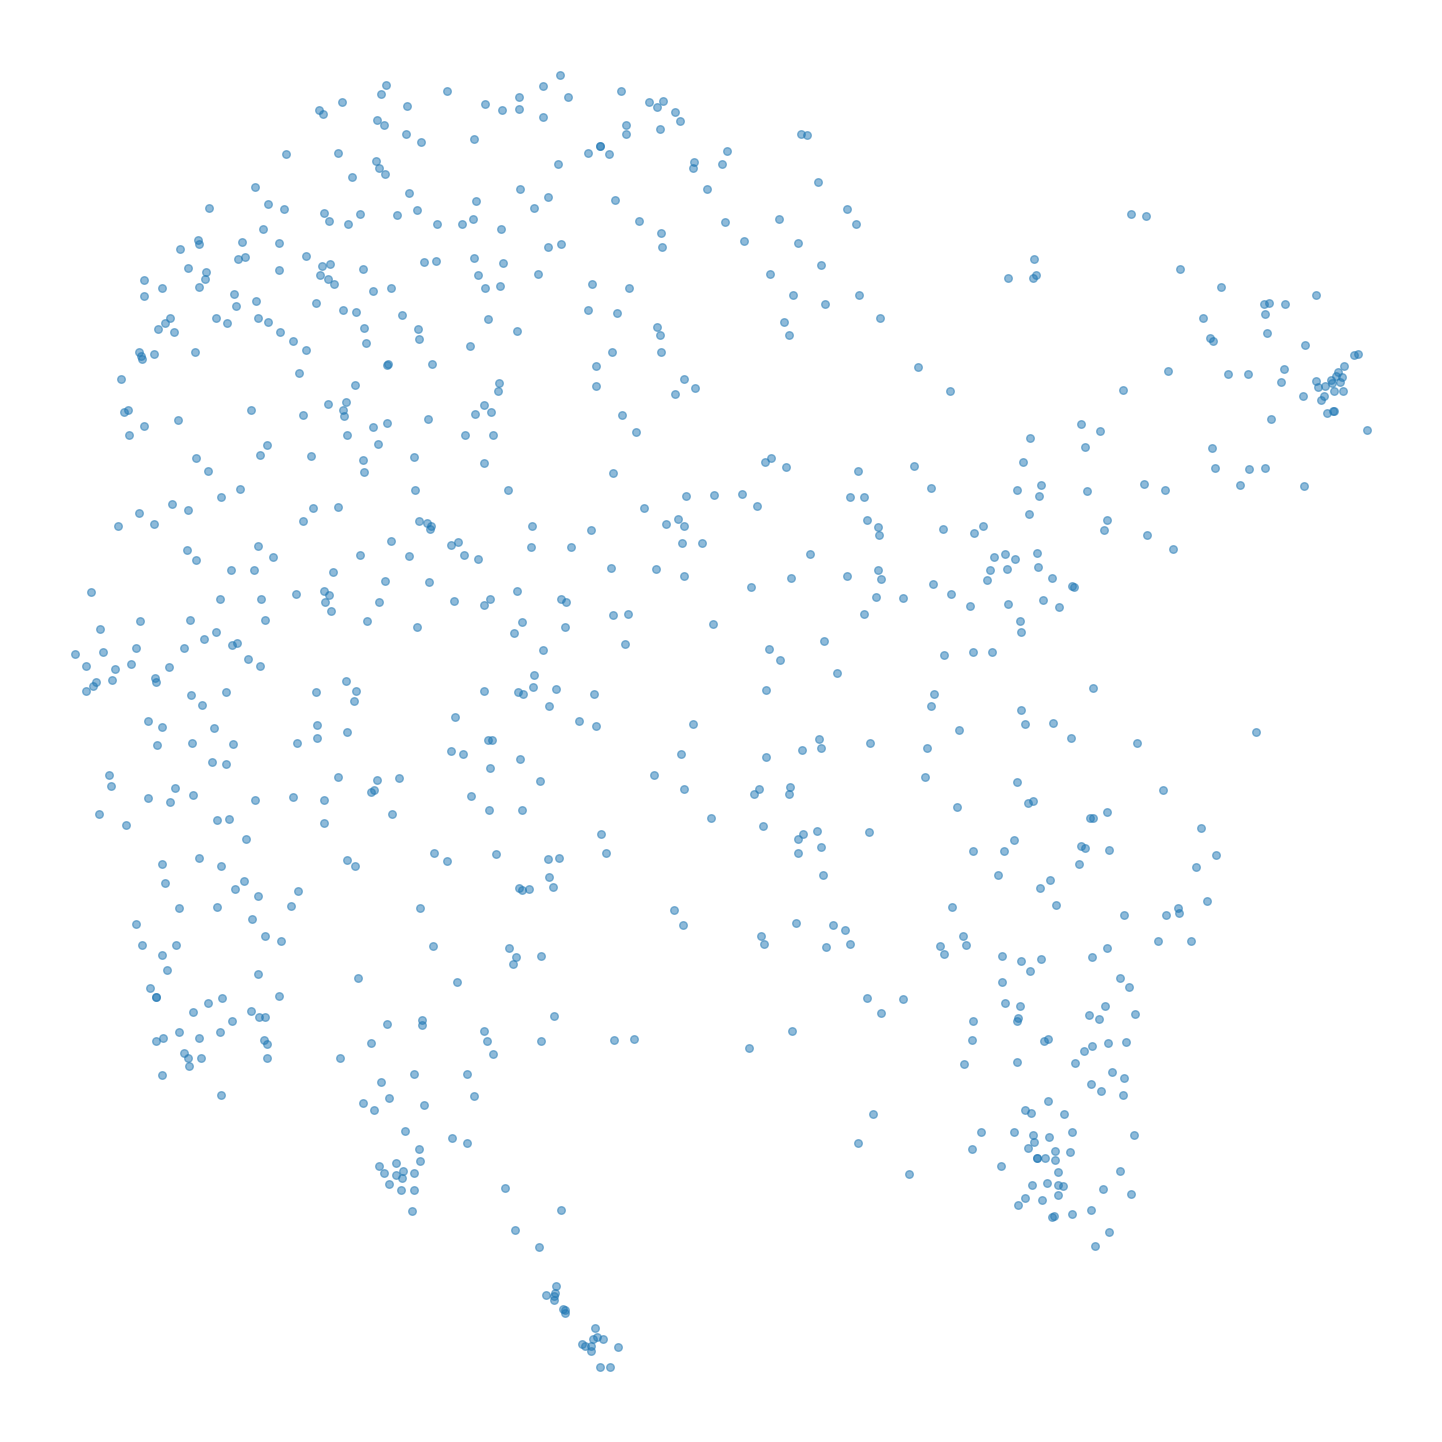

In [11]:
# dataset_id, embedding_id, n_neighbors, min_dist
ls.umap("datavis-misunderstood", "embedding-001", 25, .1)

n_clusters: 29
noise points assigned to clusters: 272
   cluster  raw_cluster
0       25           25
1        9            9
2       23           -1
3       25           25
4       14           -1
wrote /Users/enjalot/latent-scope-data/datavis-misunderstood/clusters/cluster-001.parquet
POINT SIZE 30 for 765 points
done with cluster-001


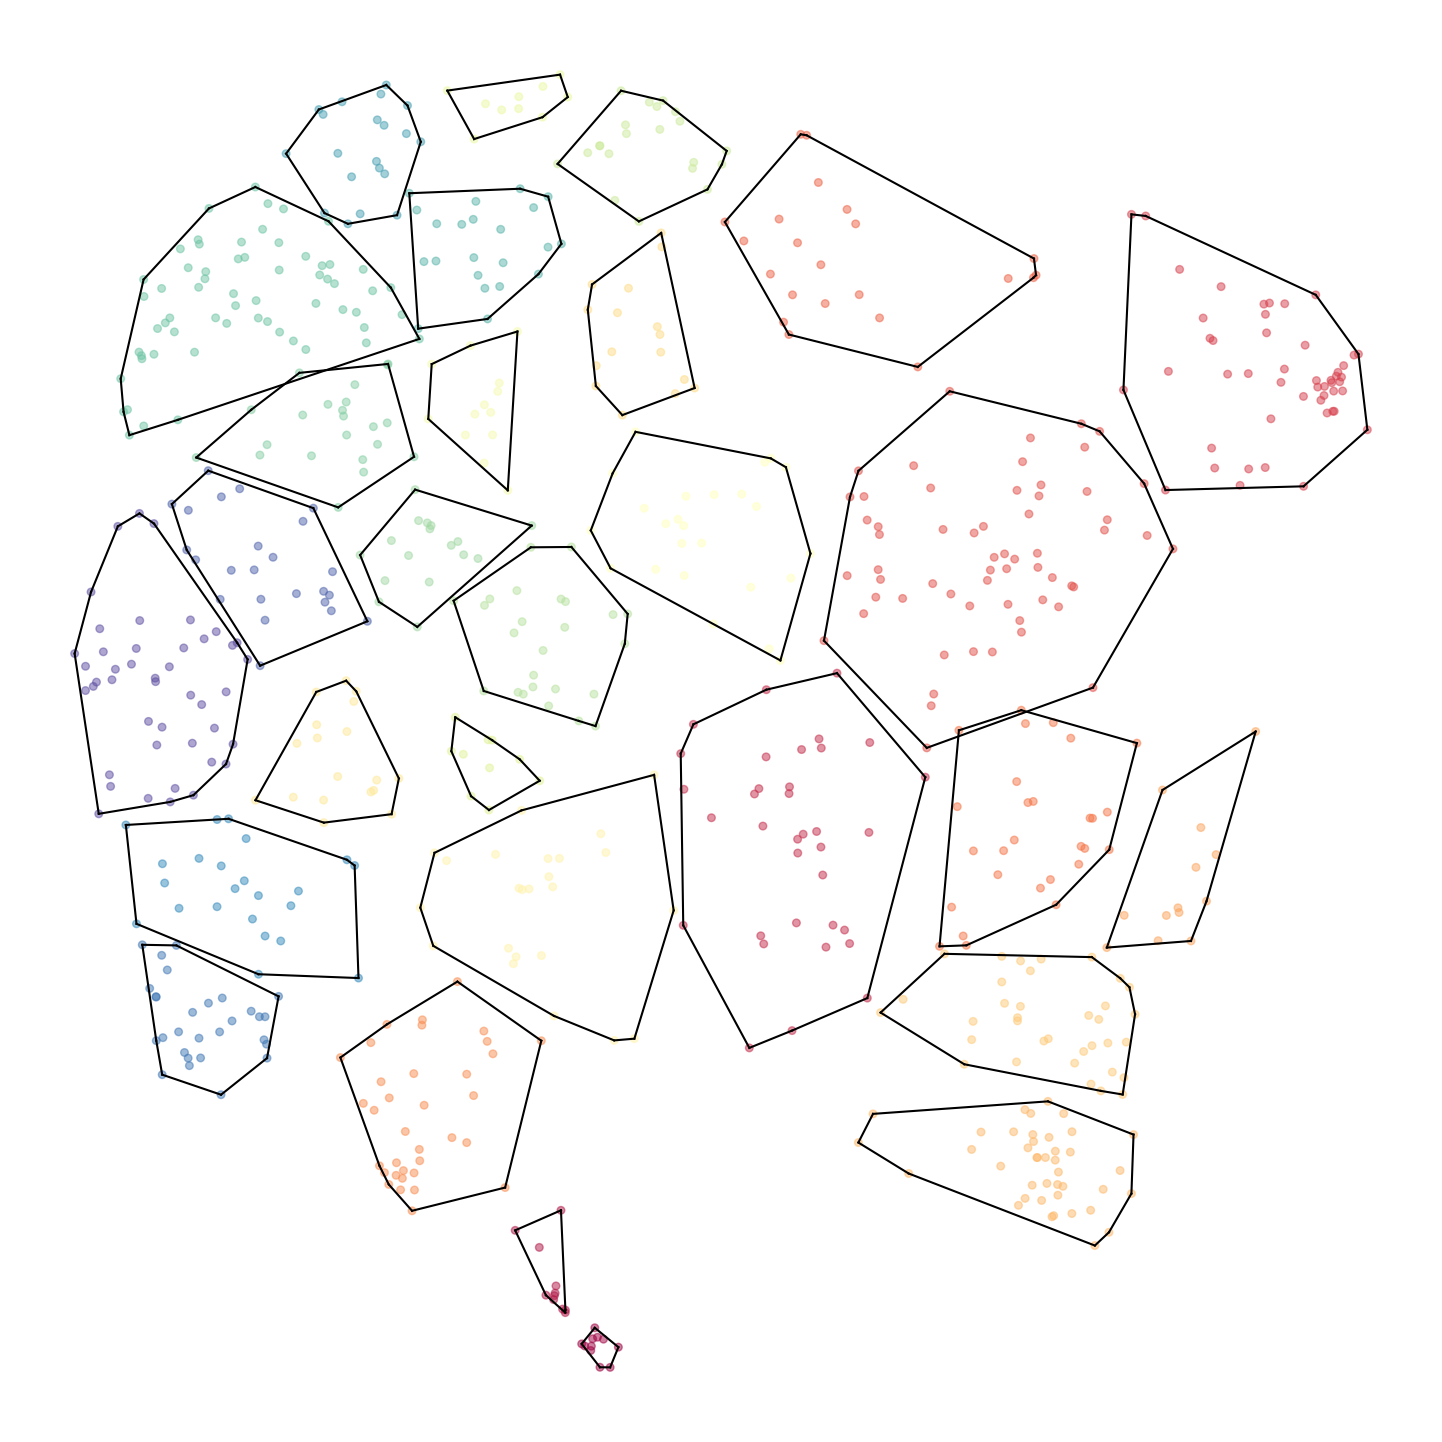

In [12]:
# dataset_id, umap_id, samples, min_samples
ls.cluster("datavis-misunderstood", "umap-001", 5, 5)

In [13]:
[m["id"] for m in ls.models.get_chat_model_list()]

['transformers-TinyLlama___TinyLlama-1.1B-Chat-v1.0',
 'transformers-HuggingFaceH4___zephyr-7b-beta',
 'openai-gpt-3.5-turbo',
 'openai-gpt-4-preview',
 'mistralai-mistral-tiny',
 'mistralai-mistral-small',
 'mistralai-mistral-medium',
 'cohereai-embed-english-v3.0',
 'togetherai-togethercomputer___m2-bert-80M-2k-retrieval']

In [17]:
cluster_id = "cluster-001"
chat_model_id = "transformers-HuggingFaceH4___zephyr-7b-beta"

In [14]:
# dataset_id, text_column, cluster_id, model_id, context
ls.label("datavis-misunderstood", "answer", cluster_id, chat_model_id, "The following items are answers to a survey question about what is misunderstood in the field of data visualization.")

  0%|          | 0/29 [00:00<?, ?it/s]

GENERATED TEXT <|system|>
You're job is to summarize lists of items with a short label of no more than 4 words. 
The following items are answers to a survey question about what is misunderstood in the field of data visualization.
The user will submit a bulleted list of items and you should choose a label that best summarizes the theme of the list so that someone browsing the labels will have a good idea of what is in the list. 
Do not use punctuation, just return a few words that summarize the list.</s>
<|user|>
<s> 1. Don't see the value vs. time spent working on viz
2. time and understanding the best viz to use
3. How time consuming is to go from a "functional" viz to a "camera ready" viz. Exponential time spent in tweaking and not in designing
4. How long it takes to make a truly amazing viz
5. how hard it is to come up with the perfect viz
6. It takes a lot of time to make a viz look good AND make sense
7. Time needed to develop useful viz
8. how much time it takes, that you determ

In [19]:
labels = pd.read_parquet(os.path.join(ls.get_data_dir(), "datavis-misunderstood", "clusters", f"{cluster_id}-labels-{chat_model_id}.parquet"))

In [ ]:
labels.head()